In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [21]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,NaN,1.97890,1.83630,2.88660,NaN,0.21541,3.09000,NaN,0.51035,0.03043,NaN
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,NaN,NaN
2,NaN,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,NaN,1.51440,2.43890,0.633580
3,NaN,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,NaN,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,NaN,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,NaN,0.15740,NaN,NaN
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,NaN,NaN,NaN,3.36580,3.755600
397,-3.479100,-1.993300,NaN,1.77210,2.55090,NaN,0.92540,NaN,3.47730,0.95496,1.52630,2.123800
398,NaN,NaN,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [22]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	74
float64		column 2	90
float64		column 3	76
float64		column 4	80
float64		column 5	72
float64		column 6	74
float64		column 7	66
float64		column 8	94
float64		column 9	95
float64		column 10	83
float64		column 11	73
float64		column 12	83


In [23]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,326.000000,310.000000,324.000000,320.000000,328.000000,326.000000,334.000000,306.000000,305.000000,317.000000,327.000000,317.000000
mean,-0.101330,0.126806,2.008354,1.902785,1.919132,1.989718,2.006274,1.963626,2.006521,1.967677,2.013799,1.947853
std,2.584709,2.732267,1.127205,1.136578,1.187285,1.147688,1.169851,1.118245,1.144727,1.175746,1.165205,1.187047
min,-6.673100,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007216,0.067105,0.006786,0.001972
25%,-0.707305,-0.729275,1.118600,0.947260,0.858727,1.041225,0.976810,1.024350,1.070000,0.978480,0.958945,0.926110
50%,-0.106780,0.085477,2.048400,1.777500,1.826150,2.026750,2.080550,1.926100,2.118600,2.016600,1.988300,1.890900
75%,0.781780,0.939445,2.971475,2.801375,3.006975,2.975175,2.965050,2.941325,2.940300,3.035900,3.058200,2.985000
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

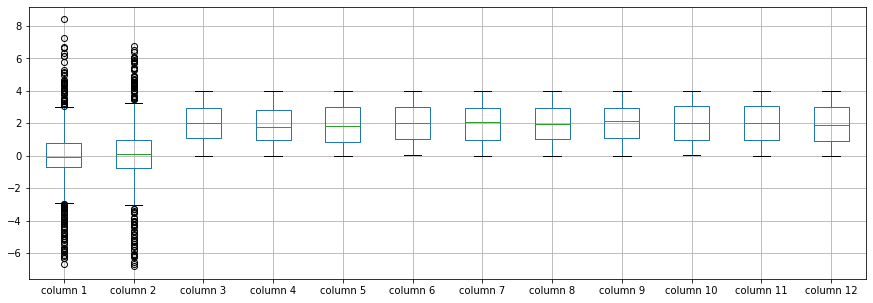

In [24]:
df.boxplot(return_type='axes', figsize=(15,5))

In [25]:
df.mean()

column 1    -0.101330
column 2     0.126806
column 3     2.008354
column 4     1.902785
column 5     1.919132
column 6     1.989718
column 7     2.006274
column 8     1.963626
column 9     2.006521
column 10    1.967677
column 11    2.013799
column 12    1.947853
dtype: float64

In [26]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.034453,-0.034892,-0.149485,-0.001938,-0.064319,0.003313,0.058624,0.036290,0.001214,0.083185,-0.013528
column 2,-0.034453,1.000000,0.018180,0.094571,-0.131354,-0.070553,0.024425,0.011844,0.013073,0.084864,-0.108920,0.054635
column 3,-0.034892,0.018180,1.000000,0.047937,-0.049214,-0.059097,-0.083618,0.076107,0.138869,-0.045446,-0.149853,-0.013273
column 4,-0.149485,0.094571,0.047937,1.000000,-0.025309,0.098434,0.052022,0.092898,-0.014728,0.164774,-0.137174,-0.084007
column 5,-0.001938,-0.131354,-0.049214,-0.025309,1.000000,0.108757,0.056900,-0.044300,0.085920,0.022312,0.004621,-0.036822
column 6,-0.064319,-0.070553,-0.059097,0.098434,0.108757,1.000000,0.000658,-0.036219,-0.025776,-0.047174,0.021742,-0.040483
column 7,0.003313,0.024425,-0.083618,0.052022,0.056900,0.000658,1.000000,-0.030196,0.046750,0.069926,-0.041377,-0.101310
column 8,0.058624,0.011844,0.076107,0.092898,-0.044300,-0.036219,-0.030196,1.000000,0.000059,-0.164615,-0.017679,-0.049338
column 9,0.036290,0.013073,0.138869,-0.014728,0.085920,-0.025776,0.046750,0.000059,1.000000,0.003854,-0.069490,0.064577
column 10,0.001214,0.084864,-0.045446,0.164774,0.022312,-0.047174,0.069926,-0.164615,0.003854,1.000000,0.030594,-0.047154


In [27]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [28]:
imputer = md.Midas(layer_structure = [12,12+12,12+12+12,12+12+12+12,12+12+12+12+12,12+12+12+12+12+12,12+12+12+12+12+12+12,12+12+12+12+12+12,12+12+12+12+12,12+12+12+12,12+12+12,12+12,12], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.285367050170898
Epoch: 1 , loss: 22.226592559814453
Epoch: 2 , loss: 22.18620361328125
Epoch: 3 , loss: 22.107409286499024
Epoch: 4 , loss: 22.14931686401367
Epoch: 5 , loss: 22.04147720336914
Epoch: 6 , loss: 22.027253494262695
Epoch: 7 , loss: 22.019829940795898
Epoch: 8 , loss: 21.95329360961914
Epoch: 9 , loss: 21.866345443725585
Epoch: 10 , loss: 21.815906600952147
Epoch: 11 , loss: 21.521129608154297
Epoch: 12 , loss: 20.778302688598632
Epoch: 13 , loss: 19.102377548217774
Epoch: 14 , loss: 17.401971588134767
Epoch: 15 , loss: 17.154338150024415
Epoch: 16 , loss: 16.92112907409668
Epoch: 17 , loss: 16.51664920806885
Epoch: 18 , loss: 16.426183280944823
Epoch: 19 , loss: 16.100249977111815
Epoch: 20 , loss: 16.086083755493163
Epoch: 21 , loss: 15.860328559875489
Epoch: 22 , loss: 16.13755931854248
Epoch: 23 , loss: 15.989168167114258
Epoch: 24 , loss: 15.970484161376953
Epoch: 25 , loss: 15.964

In [29]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [30]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.049744
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     1.065326
column 6     2.245800
column 7     3.727700
column 8     2.227200
column 9     1.108987
column 10    1.987000
column 11    1.104182
column 12    0.368260
Name: 21, dtype: float64

In [31]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [32]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,-0.013726,0.000000,0.000000,0.000000,-2.021585,0.0,0.000000,-0.341857,0.000000,0.000000,0.329916
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.291394,-2.612617
2,1.062493,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.670572,0.000000,0.000000,0.000000
3,0.426288,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.153738,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,4.754142,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.539372,0.000000,0.074915,-2.328657
396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-2.416474,1.284905,0.832352,0.000000,0.000000
397,0.000000,0.000000,-0.650079,0.000000,0.000000,-0.782540,0.0,-1.157923,0.000000,0.000000,0.000000,0.000000
398,-7.331354,0.451156,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [33]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [34]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [35]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(58.09570540240683, 163.27447192538312)

In [36]:
NRMS=numerator/denominator
NRMS


0.35581621987396

In [37]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     1.788154
column 6     2.583000
column 7     2.830600
column 8     1.804054
column 9     1.865610
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [38]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.028759,1.978900,1.836300,2.886600,0.448015,0.21541,3.090000,0.441573,0.510350,0.030430,0.430576
1,0.029389,0.206580,0.488610,1.434300,3.129900,1.277800,1.42850,0.143330,1.194800,2.131800,1.276124,1.231883
2,-0.052907,0.217560,1.610500,1.337100,3.768200,1.210000,3.99630,2.217300,1.232328,1.514400,2.438900,0.633580
3,-0.112872,-0.061874,0.364860,0.332780,0.190270,0.567160,1.66010,2.352700,0.661260,3.135100,3.938100,3.734600
4,-0.268400,-1.006000,2.882200,1.561600,3.201400,3.377400,1.52260,0.984750,0.955662,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,0.024942,3.725800,3.704800,0.882690,0.354060,1.62780,3.294000,0.545628,0.157400,0.539955,0.522743
396,0.264630,-6.107600,3.905400,1.337700,1.418700,1.686100,1.09510,1.377126,1.412805,1.374842,3.365800,3.755600
397,-3.479100,-1.993300,0.674721,1.772100,2.550900,0.687560,0.92540,0.683177,3.477300,0.954960,1.526300,2.123800
398,-0.038354,0.039686,2.494800,0.396550,2.999000,3.410100,2.95160,0.278000,0.990590,3.437400,1.816200,0.087212


In [39]:
imputations[-1].to_excel("Difdoug_C_20(imp).xlsx", index=False, header=False)